Inputs --> images(W, H, color_channels)

Numerical encoding --> normalized pixel values

Machine Learning ALG

Outputs --> Predicted output

Outputs --> Actual output

## 0. Computer vision libaiers in pyTorch

* `torchvision` - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loading fucntions for computer vision
* `trochvision.models` - get pretrained computer vision models that you can levergae for your own problesm
* `torchvision.transforms` - function for manipulating your vision data(images) to be suitable for use with ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch.
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [1]:
import torch
from torch import nn

#Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor # PIL Image or numpy.ndarray to tensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt


# Check version
print(torch.__version__)
print(torchvision.__version__)

2.1.0+cu118
0.16.0+cu118


## 1. Getting a Dataset

The data set we will be using is the FashionMNIST from torchvision.datasets

In [2]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to
    train=True, # do we want the training dataset? if false we get test
    download=True,  # do we want to downlad yes/no
    transform=torchvision.transforms.ToTensor(), # how do we want to transfomr the data
    target_transform=None # how do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root = "data",
    train =False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [3]:
 len(train_data), len(test_data)

(60000, 10000)

In [4]:
# See the first trainig example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

### 1.1 Check the input and output shapes

In [8]:
# Check the sahpe of our image
image.shape, label # label is an int

(torch.Size([1, 28, 28]), 9)

### 1.2 Visualziong our data

In [9]:
class_names[label]

'Ankle boot'

Image shape:torch.Size([1, 28, 28])


Text(0.5, 1.0, '9 - Ankle boot')

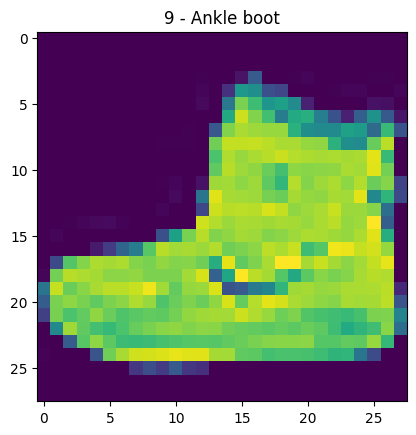

In [10]:
image,label = train_data[0]
print(f"Image shape:{image.shape}")
plt.imshow(image.squeeze()) #display images in Matplotlib plots.
plt.title(f"{label} - {class_names[label]}")

Text(0.5, 1.0, '9 - Ankle boot')

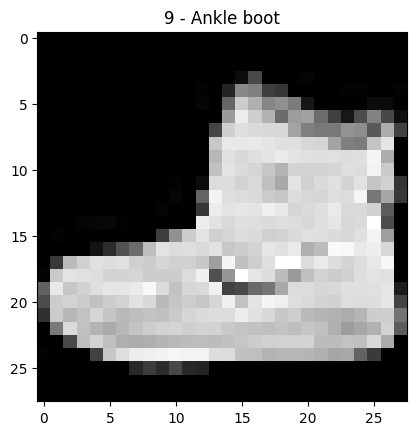

In [11]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(f"{label} - {class_names[label]}")

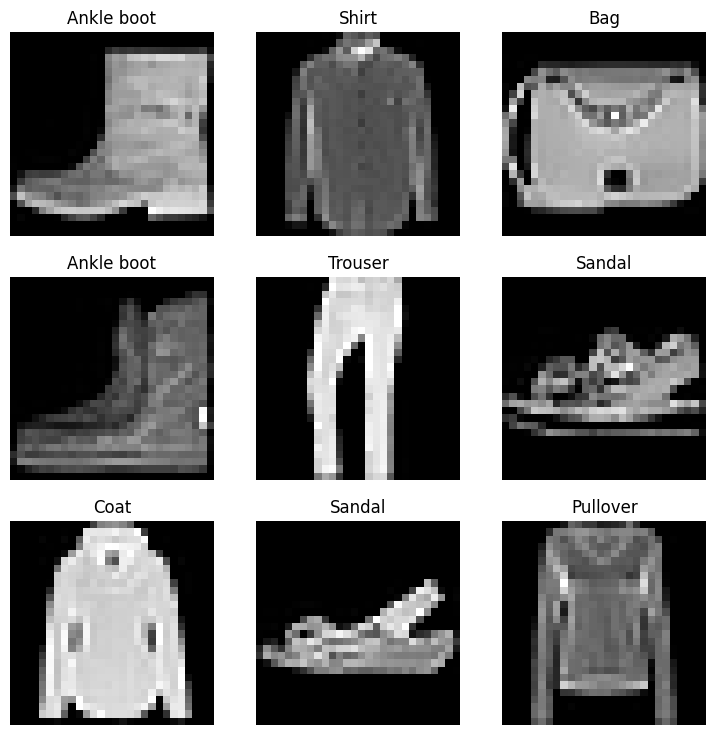

In [12]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 3,3
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[]).item() # .item() method is used with NumPy arrays to retrieve the scalar value from an array with a single element.
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

Do you think these items of clothing(images) could be modelled with puure linear lines? Or myb with non-linearlities?

## 2. Prepare Data Loader

Right now, our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into a Python iterable.

More specifically, we want to turn our data into batches(or mini-batches).

Why would we do this?

1. It is more computatinally effieicnet, as in, your computing hardware may not be able to look(store in memory) at 60000 images in one hit. So we break it down to 32 images at a time(batch size of 32).
2. It gives our nn more chances to update its gradients per epoch.

In [13]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32 # 32 is popular

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True) # True cuz if all of the shoes, t-shirt are first then its bad
                                            # So model does not learn order

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x784279b0c7c0>,
 <torch.utils.data.dataloader.DataLoader at 0x784279b0c9d0>)

In [14]:
# Let's check out what we've created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Len of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Len of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

# 1875 cuz 32 * 1875 = 60000 and thats how many items in the data
# the model is going to look at 1875 batches of 32 instead of looking at 60000 samples at one time

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x784279b0c7c0>, <torch.utils.data.dataloader.DataLoader object at 0x784279b0c9d0>)
Len of train dataloader: 1875 batches of 32...
Len of test dataloader: 313 batches of 32...


In [15]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader)) # turn it into an iterable with iter
train_features_batch.shape, train_labels_batch.shape


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 7, label size: torch.Size([])


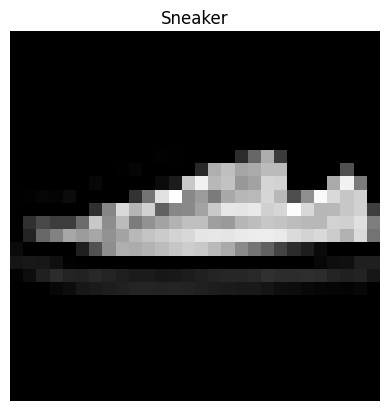

In [16]:
# Show a sample
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a basline model

When starting to build a serios of ML modelling experiemnts, its best practice to start with a baseline mode.

A baseline model is a simple model you will try and imrpove upon with subsequent models/experiments.

In other words: start simply and add complexity when necessary.

In [17]:
# Creata a flatten layer
flatten_model = nn.Flatten()

# Cet a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pas

# print out what happend
print(f'Shape before flattening: {x.shape} -> [color chanels, h, w]')
print(f'Shape after flattening: {output.shape} -> [color channels, h*w]')

Shape before flattening: torch.Size([1, 28, 28]) -> [color chanels, h, w]
Shape after flattening: torch.Size([1, 784]) -> [color channels, h*w]


In [18]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [19]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape = 784, # 28 * 28
    hidden_units = 10, # how many units in teh hidden layer
    output_shape = len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [21]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

from torch.nn.modules.loss import CrossEntropyLoss
### 3.1 Setup loss, optimizer and eval metrics

* Loss function - since we are working with multi-class data, our loss function will be nn.CrossEntropyLoss()
* Optimizer - our optmizer torch.optim.SGD()
* Evaluation metric - since we are working on a classification proble, lets use an accuracy metric

In [22]:
import requests
from pathlib import Path

# Download helper fucntions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("Already exists, skip download")
else:
  print("Downloading")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

Already exists, skip download


In [23]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr = 0.1)


### 3.2 Creating a function to time our experiments

ML is very experimental.

Two of the main things to track:
1. Model's performence(loss and accuracy etc)
2. How fast it runs



In [24]:
from timeit import default_timer as timer
def print_train_time(start: float,
                      end: float,
                      device: torch.device = None):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [25]:
start_time = timer()
# code . . .
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


4.40880000951438e-05

### 3.3 Creating a training lopp and training a model on batches of data

1. Loop through epochs.
2. Lopp thourgh trainng batches, perform training steps, calculate the train loss *per patch*.
3. Loop through testing batches, perform testing steps, calcualte the test loss *per batch*.
4. Pring out what's happening.
5. Time it all


In [26]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the numer of epochs (well keep this small for faster traing time)
epochs = 3

# Create traning and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  ### Training
  train_loss = 0
  # Add a loop to lopp through the training batches
  # the optmizer will update the gradeint per batch not per epoch
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)

    # 2. loss(per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss

    # 3.Optimzer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # 5. Optimzer step
    optimizer.step()

    if batch % 400 == 0:
      print(f"Locked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.") #batch * 32/60000


  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing loop
  test_loss, test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Calcualte loss(accumulatively)
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calculate accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1)) # need argmax becasue the test_pred is in
                                                                             #logits and we need the logit with the higest value to have the label

    # Calulcate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calucalte the test acc average per batch
    test_acc /= len(test_dataloader)

  # Print out what's happening
  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

# Calucalte train time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end = train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Locked at 0/60000 samples.
Locked at 12800/60000 samples.
Locked at 25600/60000 samples.
Locked at 38400/60000 samples.
Locked at 51200/60000 samples.

Train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.0387
Epoch: 1
------
Locked at 0/60000 samples.
Locked at 12800/60000 samples.
Locked at 25600/60000 samples.
Locked at 38400/60000 samples.
Locked at 51200/60000 samples.

Train loss: 0.4763 | Test loss: 0.4799, Test acc: 83.1969
Epoch: 2
------
Locked at 0/60000 samples.
Locked at 12800/60000 samples.
Locked at 25600/60000 samples.
Locked at 38400/60000 samples.
Locked at 51200/60000 samples.

Train loss: 0.4550 | Test loss: 0.4766, Test acc: 83.4265
Train time on cpu: 38.275 seconds


## 4. Make prediction and get Model 0 results

In [27]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [28]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """ Return a dictionary contating the results of model prediction on data_laode."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):

      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1)) # raw inputs are logits so we need to get the argmax where the highets value logit is to compare

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name" : model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(), # .item() to get a scalar
          "model_acc": acc
          }

# Calculate model 0 results on test datasets
model_0_results = eval_model(model=model_0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic-code

In [29]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. Model 1: Building a better model with non-linearity



In [30]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # flatten inputs into a single vector
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)



In [31]:
# Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape = 28*28,
                              hidden_units = 10,
                              output_shape=len(class_names)).to(device) # send to GPU if avaiable

next(model_1.parameters()).device # check where the paras of the model live

device(type='cuda', index=0)

### 6.1 Setup loss, optimizer and eval metrics

In [32]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1) # tries to update our model's parameters to reduce the loss

### 6.2 Functionizing training and evaluation/testing loops

Let's create a fucntion for:
* trainig loop
* testing loop

In [33]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Performs a traing with model trying to learn on data_loader."""
  train_loss, train_acc = 0, 0
  # Put model into trainig mode
  model.train()

  # Add a loop to lopp through the training batches
  # the optmizer will update the gradeint per batch not per epoch
  for batch, (X, y) in enumerate(data_loader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass(outputs the raw logits from the model)
    y_pred = model(X)

    # 2. loss and accuracy(per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss
    train_acc  += accuracy_fn(y_true=y,
                              y_pred=y_pred.argmax(dim=1)) # from logits --> pred labels

    # 3.Optimzer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # 5. Optimzer step
    optimizer.step()


  # Divide total train loss and acc by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.4f} | Train acc: {train_acc:.2f}%")

In [34]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device:torch.device = device):

  """ Performs a testing loop step on a model going over data_loader."""
  test_loss, test_acc = 0,0

  # Put model in eval mode
  model.eval()

  # Turn on inference mode context manager
  with torch.inference_mode():
    for X, y in data_loader:
      # Send the data to teh target devoce
      X, y = X.to(device), y.to(device)

      # 1. Forward pass (output raw logits)
      test_pred = model(X)

      # 2. Calcualte the loss/acc
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                           y_pred=test_pred.argmax(dim=1)) # go from logits -> pred labels

    # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

In [35]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_startn_on_gpu = timer()

# Set epochs
epochs = 3

# Create a optimization and evalation loop suing train_step() and train_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_startn_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.0920 | Train acc: 61.34%
Test loss: 0.95636 | Test acc: 65.00%

Epoch: 1
---------
Train loss: 0.7810 | Train acc: 71.93%
Test loss: 0.72227 | Test acc: 73.91%

Epoch: 2
---------
Train loss: 0.6703 | Train acc: 75.94%
Test loss: 0.68500 | Test acc: 75.02%

Train time on cuda: 31.408 seconds


In [36]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

In [37]:
# CPU time
total_train_time_model_0

38.275185614000065

In [38]:
# GPU time
total_train_time_model_1

31.407882943999994

Sometimes your model trains faster on CPU than GPU.
1. It could be that the overhead for copying data/model to and from the GPU outweights the compute benefit offered by the GPU.

In [39]:
# GEt model_1 results dict
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device = device):
  """ Return a dictionary contating the results of model prediction on data_laode."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      X, y = X.to(device), y.to(device)

      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1)) # raw inputs are logits so we need to get the argmax where the highets value logit is to compare

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name" : model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(), # .item() to get a scalar
          "model_acc": acc
          }

model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn,
                             device = device)

model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

## Model 2: Building A CNN

CNN's are also known ConvNets.

Cnn's are knwon for finding patterns in images

https://poloclub.github.io/cnn-explainer/

In [40]:
# Create a CNN
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  moodel from CNN explainer website.
  """
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
      nn.Conv2d(in_channels=input_shape,
                out_channels=output_shape,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.MaxPool2d(2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, # there is a trick to calcualte this
                  out_features=output_shape)
    )

  def forward(self, x):
    x=self.conv_block_1(x)
    #print("Conv_block_1: ", x.shape)
    x=self.conv_block_2(x)
    #print("Conv_block_2: ", x.shape)
    x = self.classifier(x)
    #print("Classifier: ", x.shape)
    return x

In [41]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units = 10,
                              output_shape = len(class_names)).to(device)

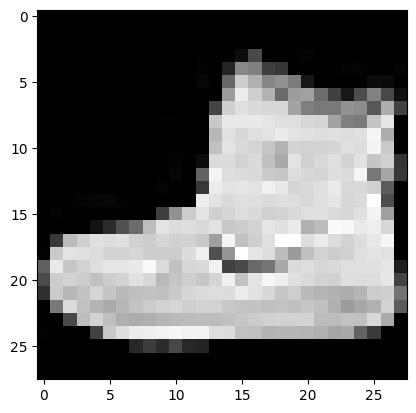

In [42]:
plt.imshow(image.squeeze(), cmap="gray")

In [43]:
# mass image through model
rand = torch.rand(size=(1,28,28))
model_2(rand.unsqueeze(0).to(device))

tensor([[ 0.0372, -0.0748,  0.0573, -0.0396, -0.0098,  0.0194, -0.0003, -0.0114,
          0.0206,  0.0003]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.1 Stepping through nn.Conv2d()

In [44]:
torch.manual_seed(42)

# Create a batch of images
image = torch.randn(size=(32,3,64,64))
test_image = image[0]

print(f"Image batch shape: {image.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\m {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:\m tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-

In [45]:
torch.manual_seed(42)
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels =3, # 3 colors RGB
                       out_channels=10, # 10 hidden layers
                       kernel_size=3, # 3 = (3,3)
                       stride=1, # The stride controls how much the filter shifts over the input data spatially
                       padding=0)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

### 7.2 Stepping thorugh nn.MaxPool2d()

In [46]:
test_image

tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978,  1.0261,  1.1465,  ...,  1.2134,  0.9354, -0.0780],
         [-1.4647, -1.9571,  0.1017,  ..., -1

In [47]:
# Print out oringial image shape without unsqueezed dimension
print(f"Test image orinial shape: {test_image.shape}")
print(f"Test image with unsqueezed dim: {test_image.unsqueeze(0).shape}")

# Creata a single nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data thorugh just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer() : {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image orinial shape: torch.Size([3, 64, 64])
Test image with unsqueezed dim: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer() : torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


In [48]:
torch.manual_seed(42)
# Create a random tensor with a smilar numer of dim to out imgaes
random_tensor = torch.randn(size=(1,1,2,2))
print("Random tensor:\n ", random_tensor)
print("Random tensor shape: ", random_tensor.shape)
print("")
# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

#Pass the ranodm tensor thorugh the max pool
max_pool_tensor = max_pool_layer(random_tensor)
print("Max pool tensor:\n ", max_pool_tensor)
print("Max pool tensor shape: ", max_pool_tensor.shape)


Random tensor:
  tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape:  torch.Size([1, 1, 2, 2])

Max pool tensor:
  tensor([[[[0.3367]]]])
Max pool tensor shape:  torch.Size([1, 1, 1, 1])


### 7.3 Setup a loss function and optimizer for model_2

In [49]:
# Setup loss fucntion/eval metrix/optimier
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

### 7.4 Training and testing model_2 using our training and test functions

In [50]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device = device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end = train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Train loss: 0.5945 | Train acc: 78.44%
Test loss: 0.39681 | Test acc: 85.79%

Epoch: 1
--------
Train loss: 0.3604 | Train acc: 87.09%
Test loss: 0.35338 | Test acc: 86.98%

Epoch: 2
--------
Train loss: 0.3249 | Train acc: 88.19%
Test loss: 0.32599 | Test acc: 88.29%

Train time on cuda: 37.478 seconds


In [51]:
# GEt model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device = device
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32599300146102905,
 'model_acc': 88.28873801916933}

In [52]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

In [53]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

## 8. Compare model results and training time

In [56]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.325993,88.288738


from matplotlib import pyplot as plt
compare_results['model_loss'].plot(kind='hist', bins=20, title='model_loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
compare_results['model_acc'].plot(kind='hist', bins=20, title='model_acc')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
compare_results['training_time'].plot(kind='hist', bins=20, title='training_time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
compare_results.groupby('model_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
compare_results.plot(kind='scatter', x='model_loss', y='model_acc', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
compare_results.plot(kind='scatter', x='model_acc', y='training_time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['training_time']
  ys = series['model_loss']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = compare_results.sort_values('training_time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('model_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='model_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('training_time')
_ = plt.ylabel('model_loss')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['training_time']
  ys = series['model_acc']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = compare_results.sort_values('training_time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('model_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='model_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('training_time')
_ = plt.ylabel('model_acc')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['training_time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'training_time'}, axis=1)
              .sort_values('training_time', ascending=True))
  xs = counted['training_time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = compare_results.sort_values('training_time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('model_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='model_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('training_time')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
compare_results['model_loss'].plot(kind='line', figsize=(8, 4), title='model_loss')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
compare_results['model_acc'].plot(kind='line', figsize=(8, 4), title='model_acc')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
compare_results['training_time'].plot(kind='line', figsize=(8, 4), title='training_time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(compare_results['model_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(compare_results, x='model_loss', y='model_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(compare_results['model_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(compare_results, x='model_acc', y='model_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(compare_results['model_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(compare_results, x='training_time', y='model_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [58]:
# Add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2
                                    ]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,38.275186
1,FashionMNISTModelV1,0.685001,75.019968,31.407883
2,FashionMNISTModelV2,0.325993,88.288738,37.478315


Text(0, 0.5, 'model')

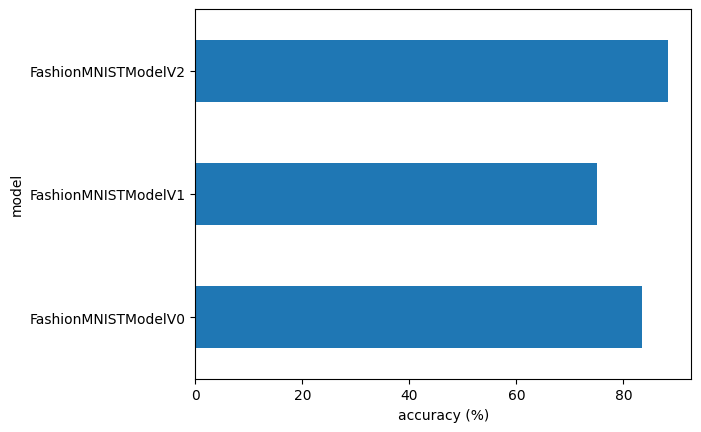

In [60]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

## 9. Make and evaluate random predictions with best model



In [69]:
def make_prediction(model: torch.nn.Module,
                    data: list,
                    device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dim and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction prob (logit -> pred prob)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_porb off the GPU for the calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)


In [70]:
import random
random.seed(42)
test_samples = []
tast_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  tast_labels.append(label)

  # View the first sample shape
  test_samples[0].shape

In [71]:
# Make predictions
pred_probs = make_prediction(model=model_2,
                             data=test_samples)

# View first two pred probs
pred_probs[:5]

tensor([[2.0692e-07, 1.4678e-08, 1.1151e-08, 2.4233e-07, 1.0325e-08, 9.9995e-01,
         3.7872e-07, 6.9769e-06, 2.1179e-05, 2.3048e-05],
        [6.0028e-03, 9.2568e-01, 4.2080e-04, 2.5991e-02, 1.3126e-02, 9.9425e-05,
         2.8405e-02, 5.7362e-05, 5.9702e-05, 1.5727e-04],
        [8.8138e-06, 2.0739e-07, 8.6619e-06, 9.3907e-06, 1.7146e-06, 6.0313e-04,
         4.8368e-06, 7.4410e-01, 1.4312e-03, 2.5384e-01],
        [1.1655e-03, 5.4435e-05, 3.0679e-01, 1.4623e-03, 6.8961e-01, 5.2919e-07,
         8.1759e-04, 1.3238e-05, 7.6471e-05, 9.2063e-06],
        [2.7711e-02, 7.8864e-06, 5.7433e-05, 9.6514e-01, 2.0807e-04, 5.7740e-08,
         6.8047e-03, 1.7547e-05, 5.3128e-05, 1.3090e-06]])

In [72]:
# Conver pred probs to labes
pred_classes = pred_probs.argmax(dim=1)
pred_classes


tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

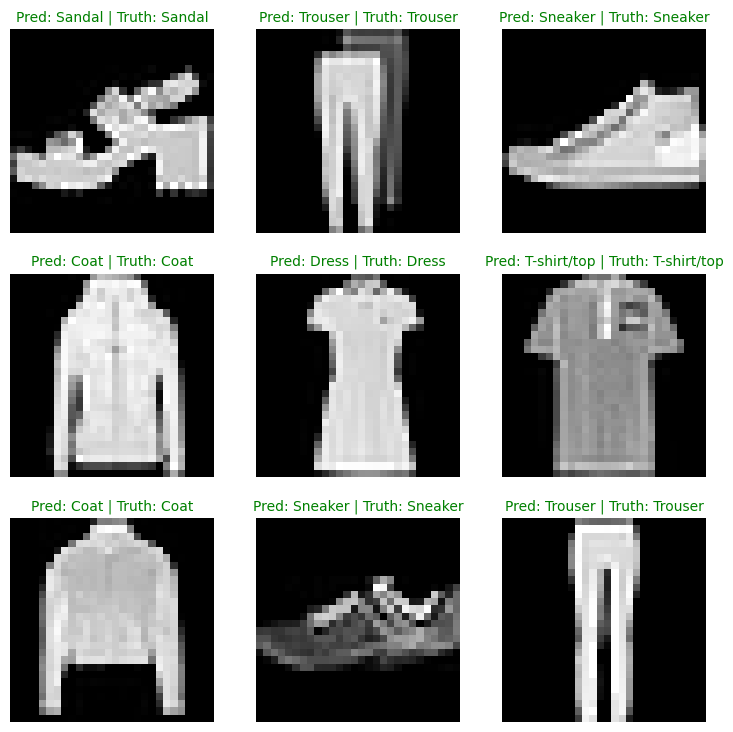

In [76]:
# Plot predictinos
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction(in text form)
  pred_label = class_names[pred_classes[i]]

  # Get the truth label(in text form)
  truth_label = class_names[tast_labels[i]]

  # Create a title
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality betwwen pred and truth
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False)

## 10. Making a confusion matrix for further prediction evalations

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix using `torchmetrixs.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`



In [80]:
# Import tqdm.auto
from tqdm.auto import tqdm


# 1. Make prediction with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making Preidcionts..."):
    # Send the data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forwward pass
    y_logit = model_2(X)
    # from logits -> pred probs -> pred labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # Put pred on CPu for eval cuz matplot lib
    y_preds.append(y_pred.cpu())

# Concantenate list of pred into a tensor
y_pred_tesnor = torch.cat(y_preds)
y_pred_tesnor

Making Preidcionts...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 8])

In [83]:
try:
  import torchmetrics, mlxtend
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend

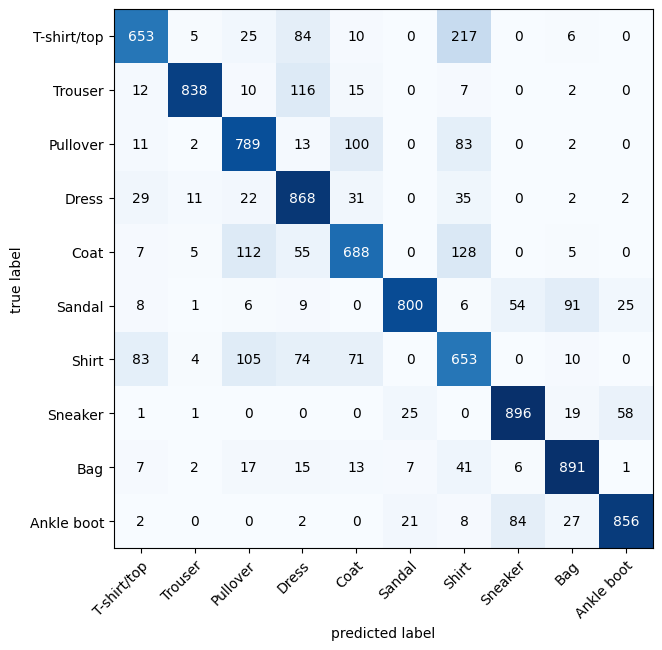

In [89]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and comapre pred to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor = confmat(preds=y_pred_tesnor,
                         target=test_data.targets)


# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplot lib likes numpy
    class_names=class_names,
    figsize=(10,7)
)

In [91]:
confmat_tensor

tensor([[653,   5,  25,  84,  10,   0, 217,   0,   6,   0],
        [ 12, 838,  10, 116,  15,   0,   7,   0,   2,   0],
        [ 11,   2, 789,  13, 100,   0,  83,   0,   2,   0],
        [ 29,  11,  22, 868,  31,   0,  35,   0,   2,   2],
        [  7,   5, 112,  55, 688,   0, 128,   0,   5,   0],
        [  8,   1,   6,   9,   0, 800,   6,  54,  91,  25],
        [ 83,   4, 105,  74,  71,   0, 653,   0,  10,   0],
        [  1,   1,   0,   0,   0,  25,   0, 896,  19,  58],
        [  7,   2,  17,  15,  13,   7,  41,   6, 891,   1],
        [  2,   0,   0,   2,   0,  21,   8,  84,  27, 856]])

## 11. Save and load best perfomring model

In [94]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

MODEL_NAME = "03_pytorch.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

PosixPath('models/03_pytorch.pth')

In [95]:
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # what obj(object) to store
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch.pth


In [96]:
# Create a new instancce
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=10
                                     )

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [97]:
# Send model to target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [98]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32599300146102905,
 'model_acc': 88.28873801916933}

In [100]:
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader = test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

  0%|          | 0/313 [00:00<?, ?it/s]

In [101]:
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32599300146102905,
 'model_acc': 88.28873801916933}